In [1]:
import pandas as pd
import tarfile
import nibabel as nib
import numpy as np 
import matplotlib.pyplot as plt
import os 
from tqdm import tqdm
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import SimpleITK as sitk



#### analyze csv files

In [5]:
# 读取 CSV 文件
file_path = '/mnt/data0/ziyue/dataset/RadGenome-ChestCT/dataset/radgenome_files/train_region_report.csv'  # 替换为你的 CSV 文件路径
data = pd.read_csv(file_path)

# 显示前几行数据
print("前几行数据:")
print(data.head())

# 显示数据的基本信息
print("\n数据基本信息:")
print(data.info())

# 数据统计描述
print("\n数据统计描述:")
print(data.describe())

# 处理缺失值（示例：删除含有缺失值的行）
data_cleaned = data.dropna()

# 显示处理后的数据
print("\n处理后的数据（删除了缺失值）:")
print(data_cleaned.head())

# 示例：按某列分组并计算均值（假设有一列名为 'column_name'）
# grouped_data = data.groupby('column_name').mean()
# print("\n按 'column_name' 分组的均值:")
# print(grouped_data)

# 保存处理后的数据到新的 CSV 文件
# output_file_path = 'cleaned_data.csv'  # 替换为你想要保存的文件路径
# data_cleaned.to_csv(output_file_path, index=False)
# print(f"\n处理后的数据已保存到 {output_file_path}")

前几行数据:
               Volumename                       Anatomy  \
0  train_16242_a_1.nii.gz                           NaN   
1  train_16242_a_1.nii.gz                          lung   
2  train_16242_a_1.nii.gz                     lung/lung   
3  train_16242_a_1.nii.gz          trachea and bronchie   
4  train_16242_a_1.nii.gz  trachea and bronchie/trachea   

                                            Sentence  
0  The widths of the mediastinal main vascular st...  
1  Millimetric nonspecific nodules were observed ...  
2  Millimetric nonspecific nodules were observed ...  
3  No occlusive pathology was detected in the tra...  
4  No occlusive pathology was detected in the tra...  

数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624876 entries, 0 to 624875
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Volumename  624876 non-null  object
 1   Anatomy     600748 non-null  object
 2   Sentence    624876 n

In [24]:
data.shape

(14501, 4)

In [25]:
480927+285086+550585+14501

1331099

In [27]:
from preprocess.preprocess_ctrate_train import read_nii_data,read_nii_files,resize_array

/mnt/data0/ziyue/anaconda3/envs/general/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/mnt/data0/ziyue/anaconda3/envs/general/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module '_watershed_cy' does not match runtime version 3.7
  return f(*args, **kwds)


In [32]:
data_path = 'train_anatomy_mask/seg_train_1_a_1/adrenal gland.nii.gz'
data = read_nii_data(data_path)
print(data.shape)

(420, 420, 101)


(array([0., 1.]), array([17813354,     3046]))


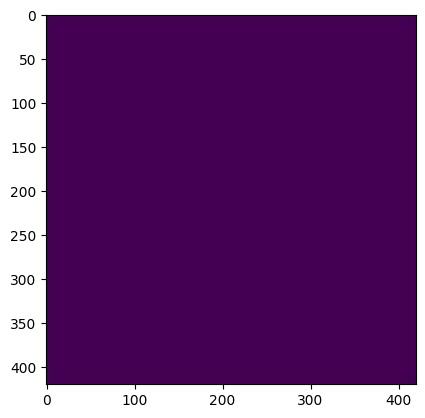

In [34]:
plt.imshow(data[:,:,50])
print(np.unique(data,return_counts=True))

In [3]:
path = '/mnt/data0/ziyue/dataset/wetransfer/DICOM/20240327/17200000/20330000/15843427'
# data_root = '/mnt/data0/ziyue/dataset/wetransfer/DICOM/20240327/17200000/20330000'
data_root = '/mnt/data0/ziyue/dataset/wetransfer/20211028/12100000/10380037'

files = os.listdir(data_root)
files.sort()

for i in range(len(files)):
    files[i] = os.path.join(data_root,files[i])

# 查看数据的形状
# 读取NIfTI文件

# img = nib.load('/mnt/data0/ziyue/dataset/wetransfer/wetransfer_dicom_2024-08-01_0258.zip')
# volume = img.get_fdata()

In [4]:
import nibabel as nib
import pydicom

# 读取 DICOM 文件
ds = pydicom.dcmread(path)
data = ds.pixel_array

print(data.shape)

# 如果你有多张 DICOM 图片，你可以将它们堆叠成一个 3D 数组
# 假设你已经有了多个文件的路径列表
dicom_files = files
volumes = np.array([pydicom.dcmread(f).pixel_array for f in dicom_files])

(512, 512)


In [75]:
volumes.shape

(1383, 512, 512)

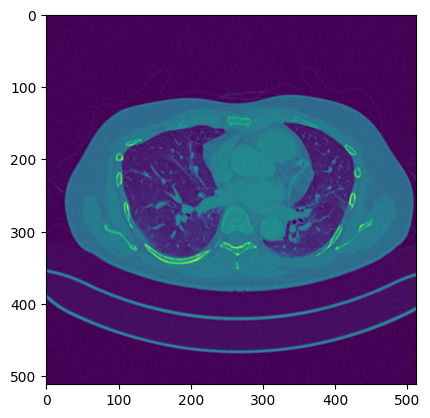

In [84]:
plt.imshow(volumes[900])